<a href="https://colab.research.google.com/github/AdrianaCaetano/Data_Analysis_with_Python/blob/main/Tutorials/6_Crypto_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Analysis with Python
## from freeCodeCamp Certification

# Bitcoin and Ether Example

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# import dataset 
file_path = 'https://raw.githubusercontent.com/ine-rmotr-curriculum/data-cleaning-rmotr-freecodecamp/master/data/btc-eth-prices-outliers.csv'
df = pd.read_csv(
    file_path,
    index_col=0,
    parse_dates=True
)
df.head()

,Bitcoin,Ether
Timestamp,,
2017-04-02,1099.169125,48.55
2017-04-03,1141.813000,44.13
2017-04-04,1141.600363,44.43
2017-04-05,1133.079314,44.90
2017-04-06,1196.307937,43.23


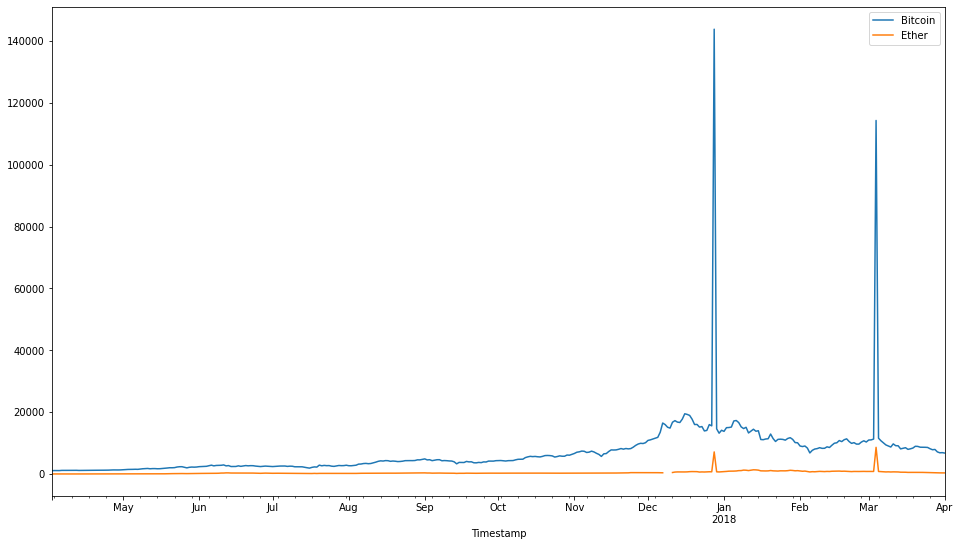

In [3]:
# visualize the data
df.plot(figsize=(16, 9))

Visualization makes it clear that there were big spikes on both ETH and BTC on Jan and Mar of 2018.

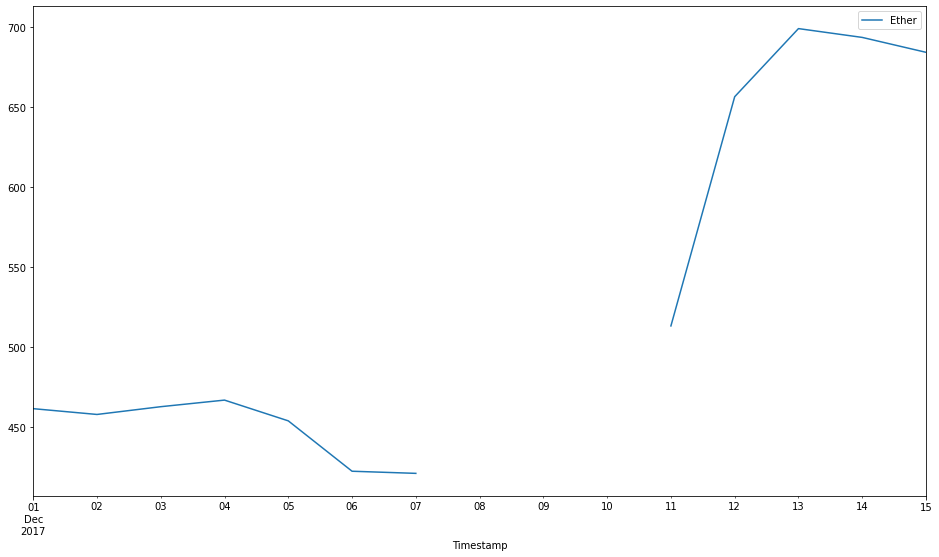

In [4]:
# Zoom in to check some missing values in between Dec/17 and Jan/19
df.loc['2017-12': '2017-12-15'].plot(y='Ether', figsize=(16, 9))

In [5]:
# Null values?
df_na = df.loc['2017-12': '2017-12-15']
df_na['Ether'].isna().values.any()

True

In [6]:
# When?
df_na.loc[df_na['Ether'].isna()]

,Bitcoin,Ether
Timestamp,,
2017-12-08,16007.436667,NaN
2017-12-09,15142.834152,NaN
2017-12-10,14869.805000,NaN


In [7]:
# Some cushion to give context
df.loc['2017-12-06': '2017-12-12']

,Bitcoin,Ether
Timestamp,,
2017-12-06,13540.980000,422.48
2017-12-07,16501.971667,421.15
2017-12-08,16007.436667,NaN
2017-12-09,15142.834152,NaN
2017-12-10,14869.805000,NaN
2017-12-11,16762.116667,513.29
2017-12-12,17276.393333,656.52


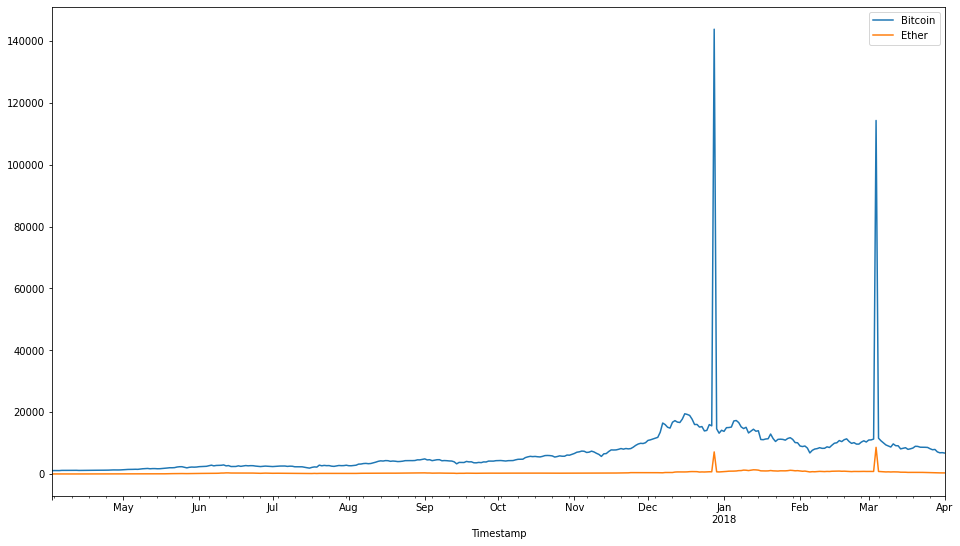

In [9]:
# Drop or fill missing values?

# Which values should we use to fill them? Backward fill? 
df.fillna(method='bfill', inplace=True)

# How does it look like now?
df.plot(figsize=(16, 9))

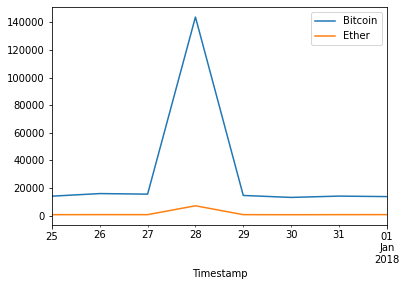

In [10]:
# Look closer on the spikes

# last 10 days of Dec/17
df['2017-12-25':'2018-01-01'].plot()

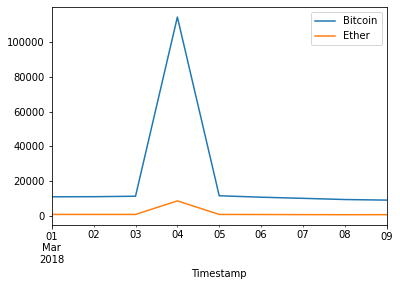

In [11]:
# First 10 days of Mar/18
df['2018-03-01': '2018-03-09'].plot()

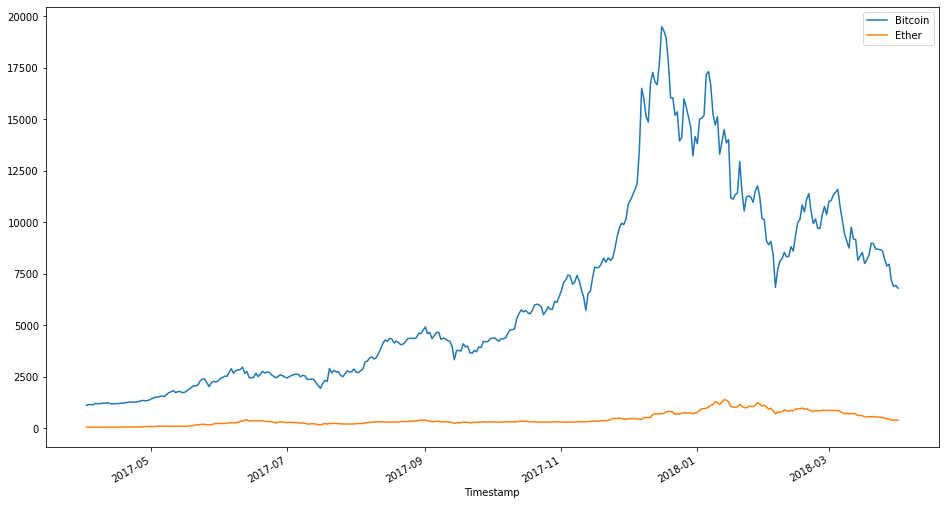

In [12]:
# they're located in '2017-12-28' and '2018-03-04'. Drop the outliers
df_cleaned = df.drop(pd.to_datetime(['2017-12-28', '2018-03-04']))
df_cleaned.plot(figsize=(16, 9))

## Analysis

### Stats

In [13]:
# Start checking the mean, notice how it's sensitive to outliers
df.mean()

Bitcoin    6996.004022
Ether       469.609068
dtype: float64

In [14]:
df_cleaned.mean()

Bitcoin    6323.509186
Ether       428.628402
dtype: float64

In [15]:
# Median shows similar values between original and cleaned data
df.median()

Bitcoin    4594.98785
Ether       309.49000
dtype: float64

In [16]:
df_cleaned.median()

Bitcoin    4580.38748
Ether       309.32000
dtype: float64

### Distribution

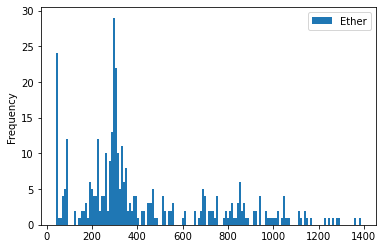

In [17]:
# Check the data distribution with a histogram
df_cleaned.plot(kind='hist', y='Ether', bins=150)

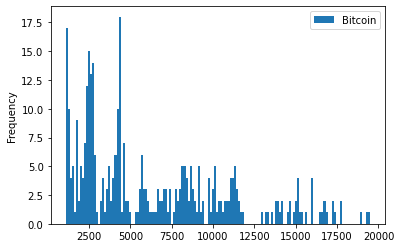

In [18]:
df_cleaned.plot(kind='hist', y='Bitcoin', bins=150)

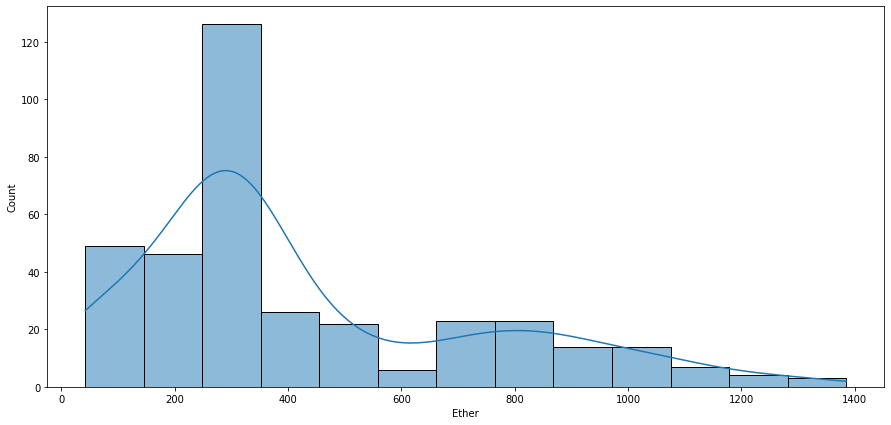

In [66]:
# Using Seaborn 
fig, ax = plt.subplots(figsize=(15, 7))

sns.histplot(df_cleaned['Ether'], ax=ax, kde=True)


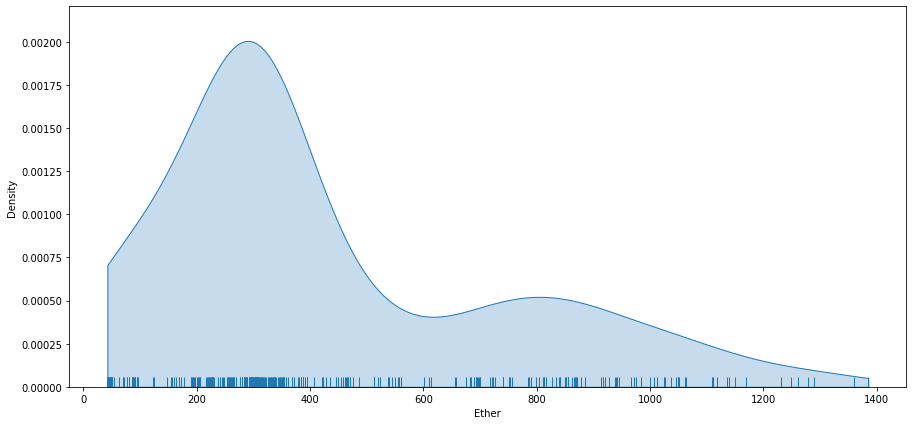

In [36]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.kdeplot(df_cleaned['Ether'], shade=True, cut=0, ax=ax)
sns.rugplot(df_cleaned['Ether'], ax=ax)

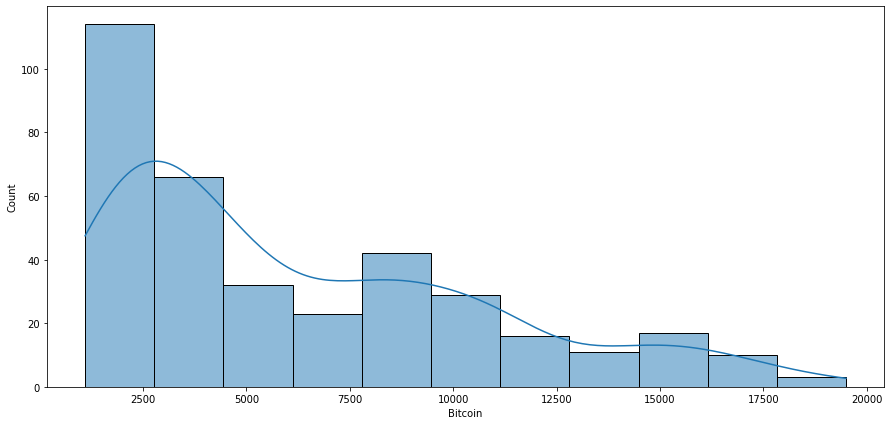

In [65]:
fig, ax = plt.subplots(figsize=(15, 7))

sns.histplot(df_cleaned['Bitcoin'], ax=ax, kde=True)

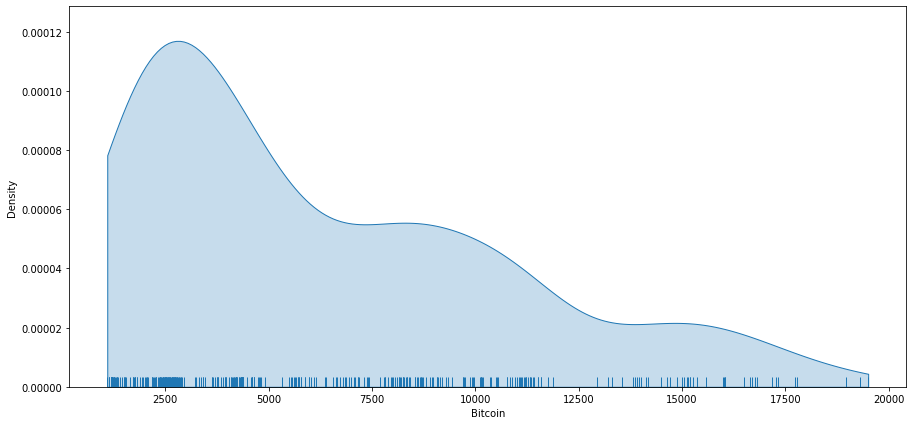

In [37]:
fig, ax = plt.subplots(figsize=(15, 7))

sns.kdeplot(df_cleaned['Bitcoin'], shade=True, cut=0, ax=ax)
sns.rugplot(df_cleaned['Bitcoin'], ax=ax)

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


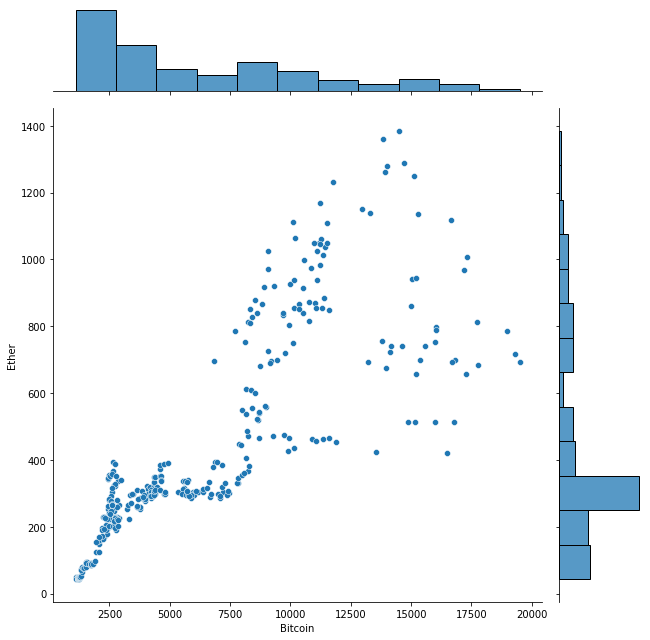

In [42]:
# Visualizing bivariate distributions

sns.jointplot(x="Bitcoin", y="Ether", data=df_cleaned, size=9)

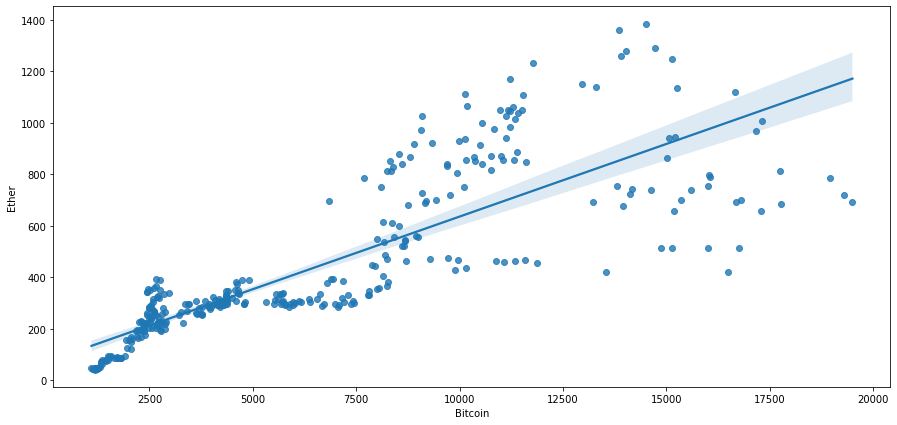

In [43]:
# Using  only a scatter plot, you can use the regplot method, that also fits a linear regression model in the plot
fig, ax = plt.subplots(figsize=(15, 7))
sns.regplot(x="Bitcoin", y="Ether", data=df_cleaned, ax=ax)

### Quantiles, quartiles and percentiles

In [44]:
df_cleaned['Bitcoin'].quantile(.2)

2438.8627342857144

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


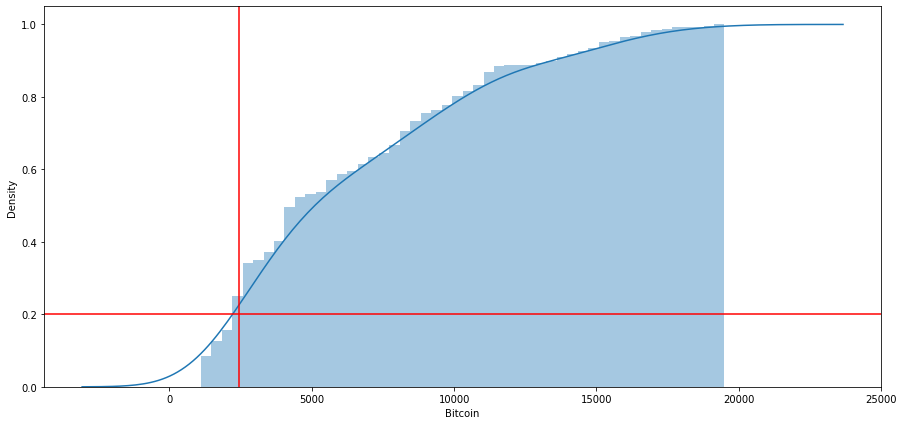

In [45]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df_cleaned['Bitcoin'], ax=ax, bins=50,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))
ax.axhline(0.2, color='red')
ax.axvline(df_cleaned['Bitcoin'].quantile(.2), color='red')

In [46]:
df_cleaned['Bitcoin'].quantile(.5)

4580.387479999999

In [47]:
df_cleaned['Bitcoin'].median()

4580.387479999999

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


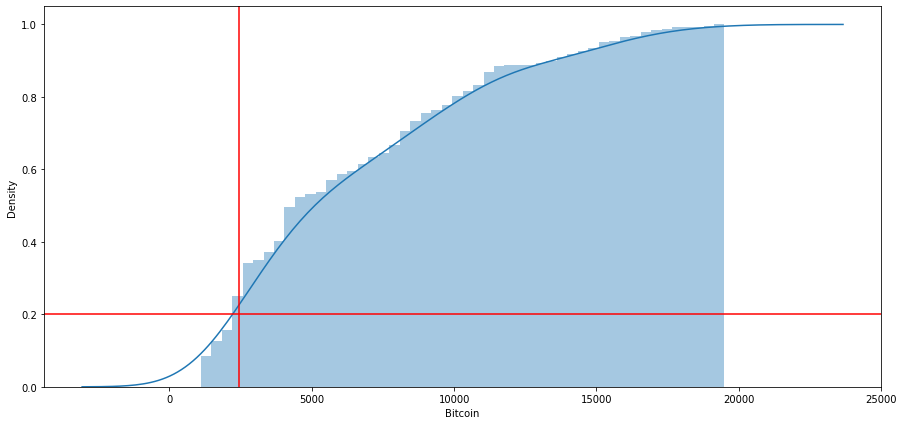

In [68]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df_cleaned['Bitcoin'], ax=ax, bins=50,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))
ax.axhline(0.2, color='red')
ax.axvline(df_cleaned['Bitcoin'].quantile(.2), color='red')

Quantile 0.25 == Percentile 25% == Quartile 1st

### Dispersion

There are a few methods we can usee to measure dispersion in the dataset, most of them well known:

Range

Variance and Standard Deviation

IQR

In [49]:
# Range= max - min values (very sensitive to outliers)
df['Bitcoin'].max() - df['Bitcoin'].min()

142706.6475416667

In [50]:
df_cleaned['Bitcoin'].max() - df_cleaned['Bitcoin'].min()

18399.51420833333

In [51]:
# Variance = measure of dispersion that takes into account the spread of all data points in a data set
# Standard Deviation = the square root of the variance
# Both are sensitive to outliers
df['Bitcoin'].var()

103766537.75278121

In [54]:
df_cleaned['Bitcoin'].var()

20374008.236050833

In [52]:
df['Bitcoin'].std()

10186.586167739475

In [53]:
df_cleaned['Bitcoin'].std()

4513.757662530282

In [55]:
# IQR = Q3 - Q1 (3rd quartile - 1st quartile) measures of 'centered' dispersion

df['Bitcoin'].quantile(.75) - df['Bitcoin'].quantile(.25)


6597.494147619047

In [56]:
df_cleaned['Bitcoin'].quantile(.75) - df_cleaned['Bitcoin'].quantile(.25)

6548.249242559523

As you can see, IQR is more robust than std or range, because it's not so sensitive to outliers.

### Analytical Analysis of invalid values

In [57]:
# std: Z scores
upper_limit = df['Bitcoin'].mean() + 2 * df['Bitcoin'].std()
lower_limit = df['Bitcoin'].mean() - 2 * df['Bitcoin'].std()

print("Upper Limit: {}".format(upper_limit))
print("Lower Limit: {}".format(lower_limit))

Upper Limit: 27369.17635730169
Lower Limit: -13377.16831365621


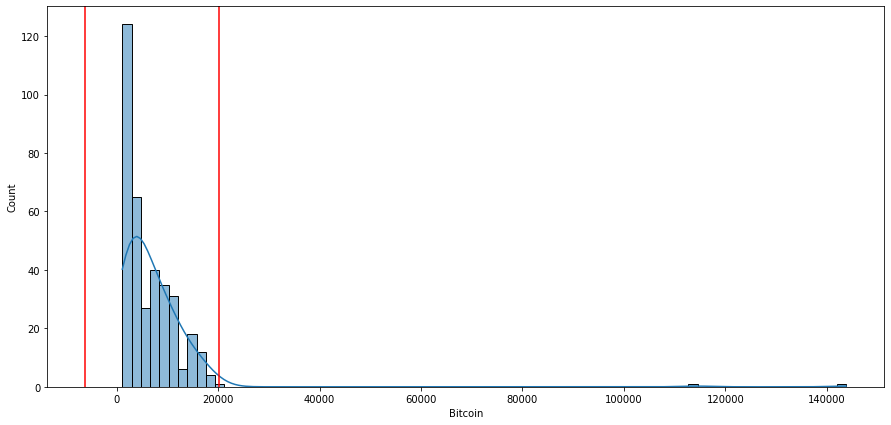

In [69]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.histplot(df['Bitcoin'], ax=ax, kde=True)
ax.axvline(lower_limit, color='red')
ax.axvline(upper_limit, color='red')

Lower limit doesn't make a lot of sense, as negative values are invalid. Anything above $27,369 is considered to be an invalid value. Good measurement, it seems accurate.

In [60]:
# Using IQR instead of std to avoid outliers effect
iqr = df['Bitcoin'].quantile(.75) - df['Bitcoin'].quantile(.25)
iqr

6597.494147619047

In [62]:
upper_limit = df['Bitcoin'].mean() + 2 * iqr
lower_limit = df['Bitcoin'].mean() - 2 * iqr

print("Upper Limit: {}".format(upper_limit))
print("Lower Limit: {}".format(lower_limit))

Upper Limit: 20190.992317060834
Lower Limit: -6198.9842734153535


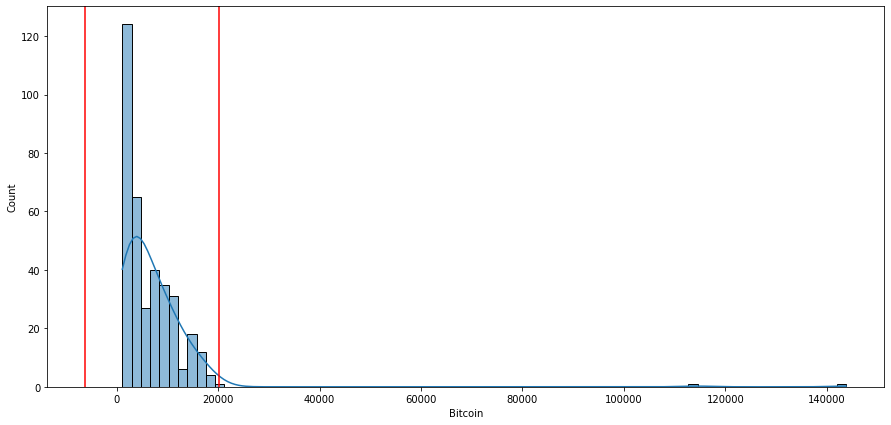

In [70]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.histplot(df['Bitcoin'], ax=ax, kde=True)
ax.axvline(lower_limit, color='red')
ax.axvline(upper_limit, color='red')

Our measurement now is a little bit less precise. There are a few valid values (20k) that seem to be above our upper limit. Regardless, it's still a good indicator.

### Cleaning Invalid Values Analytically

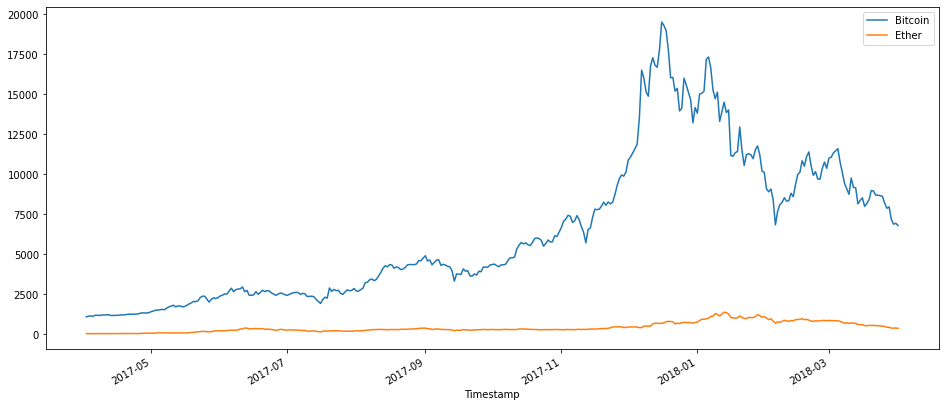

In [71]:
# to remove these invalid values analytically, we'll use the upper limit defined by standard deviation:
upper_limit = df['Bitcoin'].mean() + 2 * df['Bitcoin'].std()

df[df['Bitcoin'] < upper_limit].plot(figsize=(16, 7))

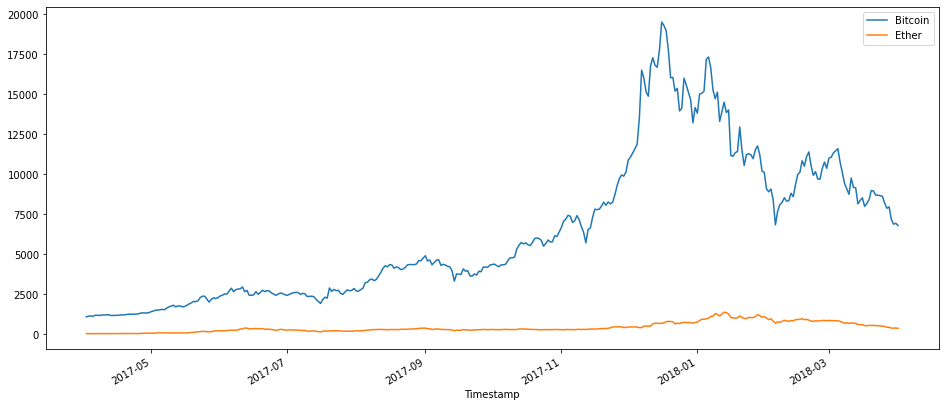

In [72]:
df.drop(df[df['Bitcoin'] > upper_limit].index).plot(figsize=(16, 7))